In [52]:
import os
import re
import jieba
import pyLDAvis as pyLDAvis
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import pyLDAvis.sklearn
import seaborn as sns

In [58]:
df = pd.read_excel(
    r'C:\Users\Chen\Desktop\dataAnalysisPlatform\dataAnalysisModel\topicModel\2018-2019茂名（含自媒体）.xlsx',sheet_name='微信公众号新闻')
document_column_name = '正文'
pattern = u'[\\s\\d,.<>/?:;\'\"[\\]{}()\\|~!\t"@#$%^&*\\-_=+a-zA-Z，。\n《》、？：；“”‘’｛｝【】（）…￥！—┄－]+'
re_sub = re.compile(' +')
df = df.drop_duplicates()
df = df.dropna()
df = df.rename(columns={
    document_column_name: 'text'
})
print(len(df))
df=df[df['text'].apply(lambda x: len(str(x))>100)]
print(len(df))
# 去重、去缺失、分词
df['cut'] = df['text'].apply(lambda x: str(x))
df['cut'] = df['cut'].apply(lambda x: re.sub(pattern, ' ', x))
df['cut'] = df['cut'].apply(lambda x: " ".join(jieba.lcut(x)))
df['cut'] = df['cut'].apply(lambda x: re.sub(re_sub, ' ', x))
print(df['cut'])
print(len(set(df['cut'].to_list())))

621
605
0       的 旅程 已经 结束 的 未来 拉开 了 帷幕 新 的 一年 里 请 对 自己 好 一点 ...
1      距离 春节 还有 一个多月 的 时间 在线 旅游 网站 的 春节 机票 销售 火爆 部分 航...
2       万平方公里 的 祖国 大地 四季 都 有 独特 美景 冬天 的 旅行 也 别 有 一番 风...
3      长 按 二维码 关注 我们 中心 联系人 林小姐 刘小姐 罗 小姐 陈小姐 市区 联系人 柯...
5       月 日 全国 旅游 工作 会议 在 厦门 召开 国家旅游局 局长 李金早 做 了 题为 以...
                             ...                        
616    由 北部湾 经济合作组织 玉林市 人民政府 主办 的 第二届 北部湾 城市 运动会 于 年 ...
617    收看 现场直播 请 点击 文章 最后 面 阅读 原文 开播 时间 年 月 日 茂名市 交通 ...
618    由 北部湾 经济合作组织 玉林市 人民政府 主办 的 第二届 北部湾 城市 运动会 于 年 ...
619    茂名 一座 面朝 大海 四季 花开 的 好心 之 城 一座 全年 空气质量 优良 天数 超过...
620    茂名 交投 集团 鲲鹏展翅 德行 天下 年 月 日 今天 茂名 第六届 全民 健身 徒步 节...
Name: cut, Length: 605, dtype: object
563


In [54]:
tf_idf_vectorizer = TfidfVectorizer()
tf_idf = tf_idf_vectorizer.fit_transform(df['cut'])
# 特征词列表
feature_names = tf_idf_vectorizer.get_feature_names_out()
# 特征词 TF-IDF 矩阵
matrix = tf_idf.toarray()
feature_names_df = pd.DataFrame(matrix,columns=feature_names)
print(feature_names_df)

      一一  一一道来   一万  一万个  一万元  一万八千        一下  一下子  一不小心   一世  ...  龙门镇   龙须  \
0    0.0   0.0  0.0  0.0  0.0   0.0  0.044166  0.0   0.0  0.0  ...  0.0  0.0   
1    0.0   0.0  0.0  0.0  0.0   0.0  0.043155  0.0   0.0  0.0  ...  0.0  0.0   
2    0.0   0.0  0.0  0.0  0.0   0.0  0.000000  0.0   0.0  0.0  ...  0.0  0.0   
3    0.0   0.0  0.0  0.0  0.0   0.0  0.000000  0.0   0.0  0.0  ...  0.0  0.0   
4    0.0   0.0  0.0  0.0  0.0   0.0  0.000000  0.0   0.0  0.0  ...  0.0  0.0   
..   ...   ...  ...  ...  ...   ...       ...  ...   ...  ...  ...  ...  ...   
600  0.0   0.0  0.0  0.0  0.0   0.0  0.000000  0.0   0.0  0.0  ...  0.0  0.0   
601  0.0   0.0  0.0  0.0  0.0   0.0  0.000000  0.0   0.0  0.0  ...  0.0  0.0   
602  0.0   0.0  0.0  0.0  0.0   0.0  0.000000  0.0   0.0  0.0  ...  0.0  0.0   
603  0.0   0.0  0.0  0.0  0.0   0.0  0.000000  0.0   0.0  0.0  ...  0.0  0.0   
604  0.0   0.0  0.0  0.0  0.0   0.0  0.000000  0.0   0.0  0.0  ...  0.0  0.0   

      龙首   龚在   龚村   龟兔  龟背竹   龟苓  龟苓膏 

100
200
300
400


<AxesSubplot:>

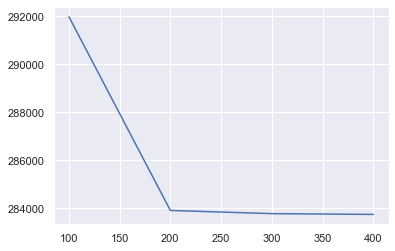

In [7]:
# 调节迭代参数
# 指定 lda 主题数
n_topics = 10
plexs = []
max_iters = []
for max_iter in range(100,500,100):
    print(max_iter)
    max_iters.append(max_iter)
    lda = LatentDirichletAllocation(
        n_components=n_topics, max_iter=max_iter,
        learning_method='batch',
        learning_offset=50.,
        random_state=0)
    # 核心，给 LDA 喂生成的 TF-IDF 矩阵
    lda.fit(tf_idf)
    plexs.append(lda.perplexity(tf_idf))
sns.set()
sns.lineplot(x=max_iters, y=plexs)

In [ ]:
from gensim import corpora, models
id2word = corpora.Dictionary(train)
corpus = [ id2word.doc2bow(sentence) for sentence in train]

1
3
5
7
9


<AxesSubplot:>

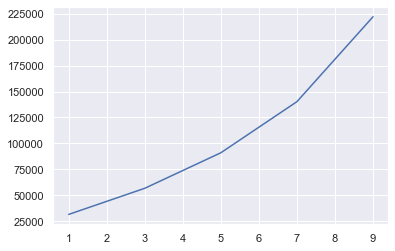

In [10]:
# 调节迭代参数
# 指定 lda 主题数
plexs = []
n_componentses = []
for n_components in range(1,10,2):
    print(n_components)
    n_componentses.append(n_components)
    lda = LatentDirichletAllocation(
        n_components=n_components, max_iter=200,
        learning_method='batch',
        learning_offset=50.,
        random_state=0)
    # 核心，给 LDA 喂生成的 TF-IDF 矩阵
    lda.fit(tf_idf)
    plexs.append(lda.perplexity(tf_idf))
sns.set()
sns.lineplot(x=n_componentses, y=plexs)

In [55]:
import jieba,os,re
from gensim import corpora, models, similarities
"""创建停用词列表"""
stopwords = [line.strip() for line in open('stopwords/cn_stopwords.txt',encoding='UTF-8').readlines()]
train = []
for line in df['cut'].to_list():
    line = [word.strip() for word in line.split(' ')]
    line = [word.strip() for word in line]
    sentense = []
    for word in line:
        if word not in stopwords:
            sentense.append(word)
    train.append(sentense)
"""构建词频矩阵，训练LDA模型"""
dictionary = corpora.Dictionary(train)
# corpus[0]: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1),...]
# corpus是把每条新闻ID化后的结果，每个元素是新闻中的每个词语，在字典中的ID和频率
corpus = [dictionary.doc2bow(text) for text in train]

In [ ]:
iterationses = []
perplexities = []
for iterations in range(200,2100,100):
    print(iterations)
    iterationses.append(iterations)
    lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=20,iterations=iterations)
    perplexity=lda.log_perplexity(corpus)
    perplexities.append(perplexity)
sns.set()
sns.lineplot(x=iterationses, y=perplexities)

In [ ]:
perplexities = []
num_topicses = []
iterations = 1300
for num_topics in range(100,501,100):
    print(num_topics)
    num_topicses.append(num_topics)
    lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics,iterations=iterations)
    perplexity=lda.log_perplexity(corpus)
    perplexities.append(perplexity)
sns.set()
sns.lineplot(x=num_topicses, y=perplexities)

In [ ]:
import math

def perplexity(ldamodel, testset, dictionary, size_dictionary, num_topics):
    """calculate the perplexity of a lda-model"""
    # dictionary : {7822:'deferment', 1841:'circuitry',19202:'fabianism'...]
    print ('the info of this ldamodel: \n')
    print ('num of testset: %s; size_dictionary: %s; num of topics: %s'%(len(testset), size_dictionary, num_topics))
    prep = 0.0
    prob_doc_sum = 0.0
    topic_word_list = [] # store the probablity of topic-word:[(u'business', 0.010020942661849608),(u'family', 0.0088027946271537413)...]
    for topic_id in range(num_topics):
        topic_word = ldamodel.show_topic(topic_id, size_dictionary)
        dic = {}
        for word, probability in topic_word:
            dic[word] = probability
        topic_word_list.append(dic)
    doc_topics_ist = [] #store the doc-topic tuples:[(0, 0.0006211180124223594),(1, 0.0006211180124223594),...]
    for doc in testset:
        doc_topics_ist.append(ldamodel.get_document_topics(doc, minimum_probability=0))
    testset_word_num = 0
    for i in range(len(testset)):
        prob_doc = 0.0 # the probablity of the doc
        doc = testset[i]
        doc_word_num = 0 # the num of words in the doc
        for word_id, num in doc.items():
            prob_word = 0.0 # the probablity of the word
            doc_word_num += num
            word = dictionary[word_id]
            for topic_id in range(num_topics):
                # cal p(w) : p(w) = sumz(p(z)*p(w|z))
                prob_topic = doc_topics_ist[i][topic_id][1]
                prob_topic_word = topic_word_list[topic_id][word]
                prob_word += prob_topic*prob_topic_word
            prob_doc += math.log(prob_word) # p(d) = sum(log(p(w)))
        prob_doc_sum += prob_doc
        testset_word_num += doc_word_num
    prep = math.exp(-prob_doc_sum/testset_word_num) # perplexity = exp(-sum(p(d)/sum(Nd))
    print ("the perplexity of this ldamodel is : %s"%prep)
    return prep

In [92]:
import csv
import datetime
import re
import pandas as pd
import numpy as np
import jieba
import matplotlib.pyplot as plt
import jieba.posseg as jp, jieba
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import warnings
#warnings.filterwarnings("ignore")

# Load data
csv_data = df
print(csv_data.shape)

# 设置四折交叉验证
kf = KFold(n_splits = 4, shuffle=False)

perplexity_train_all = []
perplexity_test_all = []
csv_data =df[[(len(str(x)) > 100) for x in df['cut']]]
#print(list(csv_data['cut'].values))
for train_index , test_index in kf.split(list(csv_data['cut'].values)):
    # 划分数据集
    train = [ csv_data.iloc[x,4] for x in train_index]
    test = [ csv_data.iloc[x,4] for x in test_index]

    vectoriser = CountVectorizer(stop_words = 'english', max_features=1000)
    doc_train = vectoriser.fit_transform(train)
    features = vectoriser.get_feature_names()
    doc_test = vectoriser.fit_transform(test)

    perplexity_train = []
    perplexity_test = []

    # 这两个参数可以根据自己的需要设定
    alpha = 0.005
    beta = 0.1

    # 进行迭代的topic可以适当增加，这里只用10以内进行计算
    for topics in range(10,100,10):
        # Fit LDA to the data
        LDA = LatentDirichletAllocation(n_components = topics, doc_topic_prior = alpha, topic_word_prior = beta, max_iter=300, learning_method='batch')

        # 用来监督处理进程
        news_lda = LDA.fit(doc_train)
        perplexity_train.append(news_lda.perplexity(doc_train))
        perplexity_test.append(news_lda.perplexity(doc_test))
        print(topics, end = '   ')

    perplexity_train_all.append(perplexity_train)
    perplexity_test_all.append(perplexity_test)

(605, 5)
[' 一粒 老鼠屎 坏 了 一 锅汤 这个 保护伞 打得 太 及时 了 发出 这一 感慨 的 是 广东省 珠海市 香洲区 的 群众 年 至 年间 该区 南屏 工商 质监 管理所 原 所长 刘晓锋 收受 某 旅游 商场 经营者 的 贿赂 对 该 商场 坑蒙拐骗 强迫 交易 涉黑 涉恶 等 行为 包庇 纵容 导致 该 商场 成为 坑害 群众 的 重灾区 年 月 刘晓锋 被 开除党籍 开除公职 涉嫌犯罪 问题 移送 司法机关 广东省 纪委 监委 高度重视 惩治 涉黑 涉恶 腐败 和 保护伞 工作 今年以来 省纪委 监委 成立 惩治 涉黑 涉恶 腐败 专项 工作 办公室 制定 关于 在 扫黑 除恶 专项斗争 中 强化 监督 执纪 问责 的 实施 意见 指导 各级 纪检监察 机关 健全 领导 体制 和 工作 机制 全面 排查 线索 截至 目前 全省 各级 纪检监察 机关 共 摸排 涉黑 涉恶 腐败 和 保护伞 问题 线索 条 立案查处 人 其中 给予 党纪 政务 处分 人 移送 司法机关 人 为 激发 群众 检举 揭发 涉黑 涉恶 腐败 及 保护伞 的 热情 广东省 纪委 监委 配合 省 扫黑 除恶 办 出台 了 涉黑 涉恶 线索 举报 奖励 办法 在 举报电话 增设 涉黑 涉恶 腐败 举报 专线 对涉 黑涉 恶 腐败 线索 快速 处置 优先 反馈 广东省委 把 扫黑 除恶 专项斗争 纳入 巡视 巡察 工作 内容 要求 巡视 巡察 机构 广泛开展 专项 和 机动 式 巡视 巡察 省委 第二轮 巡视 已 发现 问题 线索 条 省纪委 监委 各 派驻 出 机构 监督 驻 在 单位 依法执法 公正司法 情况 驻 省公安厅 纪检监察 组 今年 上半年 已 立案 人 省纪委 监委 对 一些 重大案件 加强 督办 甚至 直接 办理 广东省 纪委 监委 相关 负责人 说 省纪委 监委 建立 纪检监察 室 联系 督导 地区 和 部门 制度 建立 重点 问题 线索 督办 清单 省纪委 监委 直接 督办 了 惠州市 某村 党支部 书记 村委会 主任 涉恶 问题 汕头市 某 社区 居委会 党支部 书记 涉恶 问题 等 起涉 黑涉 恶 腐败 和 保护伞 典型 问题 针对 一些 基层 不敢 不会 不想 办案 问题 广东省 纪委 监委 指导 各县 市 区 纪委 监委 整合 机关 派驻 

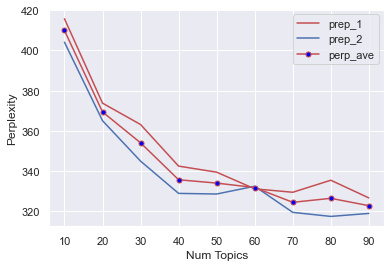

In [95]:
# 求均值
perplexity = [(perplexity_train_all[0][i]+perplexity_train_all[1][i])/2 for i in range(9)]

plt.plot(range(10,100,10),perplexity_train_all[0], label='prep_1', color='r')
plt.plot(range(10,100,10),perplexity_train_all[1], label='prep_2', color='b')
plt.plot(range(10,100,10),perplexity,label='perp_ave',color='r',marker='o', markerfacecolor='blue',markersize=5)

plt.xlabel("Num Topics")
plt.ylabel("Perplexity")
plt.legend(loc='best')

plt.show()